In [1]:
from load import *
import os
import numpy as np
from util import *

In [ ]:
shuffle_data()

In [2]:
# read in the data and split into train and test.
import pickle
os.chdir("E:\Spring_2017\machine_learning\homework\hw3\data")
reviews = pickle.load( open( "reviews.p", "rb" ) )
train = reviews[:1500]
test = reviews[1500:]

In [4]:
def to_sparse(list):
    from collections import Counter
    sparse = Counter(list)
    return sparse

In [5]:
# 6.2
def pegasos(X, lambda_reg, iter_num):
    i,t = 0, 1
    theta=dict()
    length_x = len(X)
    #converge = False
    while(i<iter_num): #and converge):
        i=i+1
        for j in range(length_x):
            t = t + 1
            eta = 1/(lambda_reg*t)
            review_j = X[j]
            y = review_j[-1]
            word_bag = to_sparse(review_j[:-1])
            #print(y)
            theta_temp = theta.copy()
            increment(theta,1-eta*lambda_reg, theta_temp)
            if y*dotProduct(word_bag, theta)<1:
                increment(theta, eta*y, word_bag)
    return theta

In [45]:
theta = pegasos(train[:3], 1, 2)
print(dotProduct(to_sparse(train[0][:-1]),theta))
print(train[0][-1])

print(dotProduct(to_sparse(train[1][:-1]),theta))
print(train[2][-1])

#theta = {"a":1,"b":2}
#dotProduct(to_sparse(reviews[0][:-1]), theta)
#to_sparse(reviews[0][:-1])

-37073.39166666668
-1
-18834.97916666675
-1


In [40]:
# 6.3
def pegasos_fast(X, lambda_reg, iter_num):
    i,t,s = 0, 1, 1
    W=dict()
    length_x = len(X)
    #converge = False
    while(i<iter_num): #and converge):
        i=i+1
        for j in range(length_x):
            t = t + 1
            eta = 1/(lambda_reg*t)
            s = (1 -eta*lambda_reg)*s
            review_j = X[j]
            y = review_j[-1]
            word_bag = to_sparse(review_j[:-1])
            if y*dotProduct(word_bag, W)<1:
                increment(W, eta*y/s, word_bag)
        w = dict()
        increment(w, s, W)
    return w

In [63]:
pegasos(train,1,1)

{'nephew': inf,
 'curmudgeonly': inf,
 'witness': inf,
 'obserable': inf,
 'biography': inf,
 'honestly': inf,
 'wacky': inf,
 "hudson's": inf,
 'stairwells': 4.0516552002039496e+236,
 'everpopular': inf,
 'kingsley': inf,
 'immersed': 4.2583090492278755e+195,
 'paraphernalia': 9.449132421517374e+182,
 'duke': inf,
 'slowly': inf,
 'residents': inf,
 'feign': 6.501124018634983e+237,
 'style': inf,
 'slayer': inf,
 'golan': inf,
 'unworthy': inf,
 'hormones': inf,
 'vows': inf,
 'digging': inf,
 'car': inf,
 'consistently': inf,
 'slams': inf,
 'obscures': inf,
 'logan': inf,
 'minielwood': 1.837532248085303e+249,
 'decoy': inf,
 'noir': inf,
 "inkpot's": 6.961035968814423e+287,
 'splenetik': inf,
 'everett': inf,
 'worst': inf,
 'yankee': inf,
 'enlivened': 2.153461096337489e+242,
 'sunken': 3.6955608314041566e+227,
 'emailed': 9.043984538026024e+201,
 'students': inf,
 'auteur': inf,
 'replies': inf,
 'interpretations': inf,
 'branagh': inf,
 'thandie': inf,
 'insipid': inf,
 'toning'

In [41]:
#6.5
def check_one(X, theta):
    dict_x = to_sparse(X[:-1])
    if dotProduct(dict_x, theta)<0:
        return -1
    else:
        return 1
    
    
def check(X, theta):
    length_x = len(X)
    y = [X[i][-1] for i in range(length_x)]
    result = [check_one(X[i],theta) for i in range(length_x)]
    correct = 0
    for i in range(length_x):
        if y[i] == result[i]:
            correct+=1
    acc = correct/length_x
    return acc

lambda=  1e-05
lambda=  0.0001
lambda=  0.001
lambda=  0.01
lambda=  0.1
lambda=  1
lambda=  10
lambda=  100
lambda=  1000
lambda=  10000


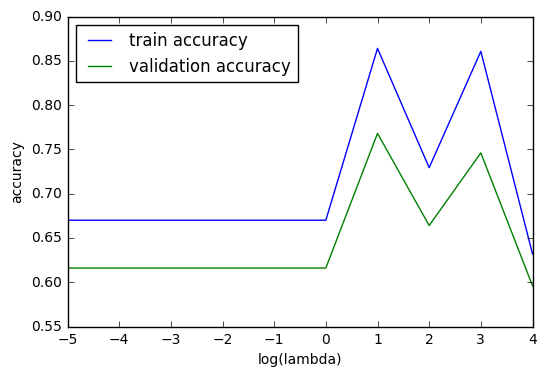

In [42]:
#6.6
import matplotlib.pyplot as plt
train_list = []
valid_list = []
for i in range(-5,5):
    lambda_reg = 10**(i);
    print("===================")
    print("lambda= ", lambda_reg)
    w = pegasos_fast(train, lambda_reg, 2)
    acc_train = check(train, w)
    acc_valid = check(test, w)
    train_list.append(acc_train)
    valid_list.append(acc_valid)

plt.plot(range(-5,5), train_list,label="train accuracy")
plt.plot(range(-5,5), valid_list,label="validation accuracy")
plt.xlabel("log(lambda)")
plt.ylabel("accuracy")
plt.legend(loc='upper left')
plt.show()

In [48]:
import matplotlib.pyplot as plt
import numpy as np
def plot_acc(lower, upper, bar):
    train_list = []
    valid_list = []
    lambda_list = np.linspace(10**(lower),10**(upper),bar)
    for lambda_reg in lambda_list:
        print("lambda= ", lambda_reg)
        w = pegasos_fast(train, lambda_reg, 2)
        acc_train = check(train, w)
        acc_valid = check(test, w)
        train_list.append(acc_train)
        valid_list.append(acc_valid)

    plt.plot(lambda_list, train_list,label="train accuracy")
    plt.plot(lambda_list, valid_list,label="validation accuracy")
    plt.xlabel("log(lambda)")
    plt.ylabel("accuracy")
    plt.legend(loc='lower left')
    plt.show()

lambda=  1.0
lambda=  102.0
lambda=  203.0
lambda=  304.0
lambda=  405.0
lambda=  506.0
lambda=  607.0
lambda=  708.0
lambda=  809.0
lambda=  910.0
lambda=  1011.0
lambda=  1112.0
lambda=  1213.0
lambda=  1314.0
lambda=  1415.0
lambda=  1516.0
lambda=  1617.0
lambda=  1718.0
lambda=  1819.0
lambda=  1920.0
lambda=  2021.0
lambda=  2122.0
lambda=  2223.0
lambda=  2324.0
lambda=  2425.0
lambda=  2526.0
lambda=  2627.0
lambda=  2728.0
lambda=  2829.0
lambda=  2930.0
lambda=  3031.0
lambda=  3132.0
lambda=  3233.0
lambda=  3334.0
lambda=  3435.0
lambda=  3536.0
lambda=  3637.0
lambda=  3738.0
lambda=  3839.0
lambda=  3940.0
lambda=  4041.0
lambda=  4142.0
lambda=  4243.0
lambda=  4344.0
lambda=  4445.0
lambda=  4546.0
lambda=  4647.0
lambda=  4748.0
lambda=  4849.0
lambda=  4950.0
lambda=  5051.0
lambda=  5152.0
lambda=  5253.0
lambda=  5354.0
lambda=  5455.0
lambda=  5556.0
lambda=  5657.0
lambda=  5758.0
lambda=  5859.0
lambda=  5960.0
lambda=  6061.0
lambda=  6162.0
lambda=  6263.0
lamb

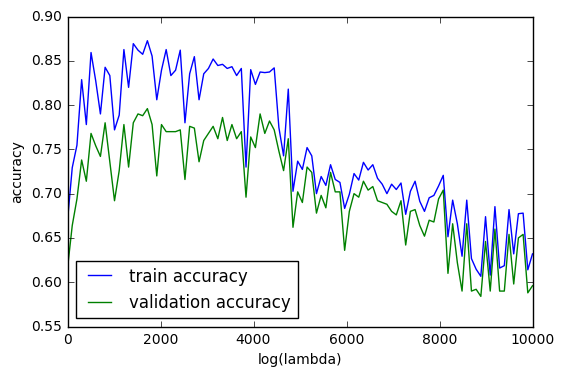

In [46]:
c

lambda=  100.0
lambda=  149.494949495
lambda=  198.98989899
lambda=  248.484848485
lambda=  297.97979798
lambda=  347.474747475
lambda=  396.96969697
lambda=  446.464646465
lambda=  495.95959596
lambda=  545.454545455
lambda=  594.949494949
lambda=  644.444444444
lambda=  693.939393939
lambda=  743.434343434
lambda=  792.929292929
lambda=  842.424242424
lambda=  891.919191919
lambda=  941.414141414
lambda=  990.909090909
lambda=  1040.4040404
lambda=  1089.8989899
lambda=  1139.39393939
lambda=  1188.88888889
lambda=  1238.38383838
lambda=  1287.87878788
lambda=  1337.37373737
lambda=  1386.86868687
lambda=  1436.36363636
lambda=  1485.85858586
lambda=  1535.35353535
lambda=  1584.84848485
lambda=  1634.34343434
lambda=  1683.83838384
lambda=  1733.33333333
lambda=  1782.82828283
lambda=  1832.32323232
lambda=  1881.81818182
lambda=  1931.31313131
lambda=  1980.80808081
lambda=  2030.3030303
lambda=  2079.7979798
lambda=  2129.29292929
lambda=  2178.78787879
lambda=  2228.28282828
lamb

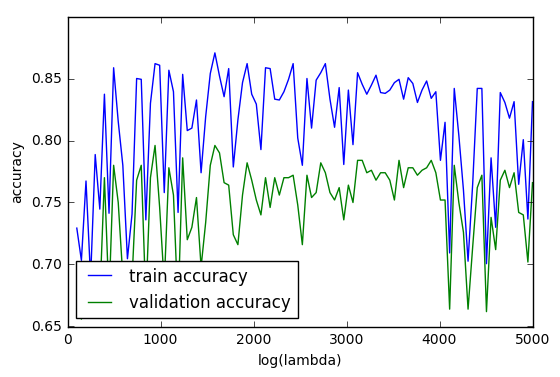

In [49]:
plot_acc(np.log10(100), np.log10(5000), 100)

In [ ]:
#6.7
def check_one(X, theta):
    dict_x = to_sparse(X[:-1])
    if dotProduct(dict_x, theta)<0:
        return -1
    else:
        return 1
    
    
def check(X, theta):
    length_x = len(X)
    y = [X[i][-1] for i in range(length_x)]
    result = [check_one(X[i],theta) for i in range(length_x)]
    correct = 0
    for i in range(length_x):
        if y[i] == result[i]:
            correct+=1
    acc = correct/length_x
    return acc